In Part 1 of the project, correlation analysis was conducted on the preprocessed dataset, followed by a Granger causality study. While the Granger test assumes stationarity, this requirement was validated using the Augmented Dickey-Fuller (ADF) test. Therefore, differencing was not required, and the Granger causality test could be applied directly to the original data as an exploratory tool to detect potential lead-lag relationships between variables.

# Importing DataFrame

In [31]:
import pandas as pd
import numpy as np
from helpermodules.granger_causality import GrangerCausalityAnalysis
import matplotlib.pyplot as plt
import pickle
from helpermodules.correlation_study import CorrelationAnalysis


In [ ]:

# Load the pickle file
with open('data/pickle_files/cleaned_nasdaq_dataframe.pkl', 'rb') as file:
    df = pickle.load(file)
    
    
# Get list of tickers from DataFrame columns
tickers = df.columns.tolist()
# Exclude the ticker 'GOOG' from the tickers list
tickers.remove('GOOG')
# Drop the 'GOOG' column from the DataFrame
df = df.drop(columns=['GOOG'])


# Applying Correlation Analysis

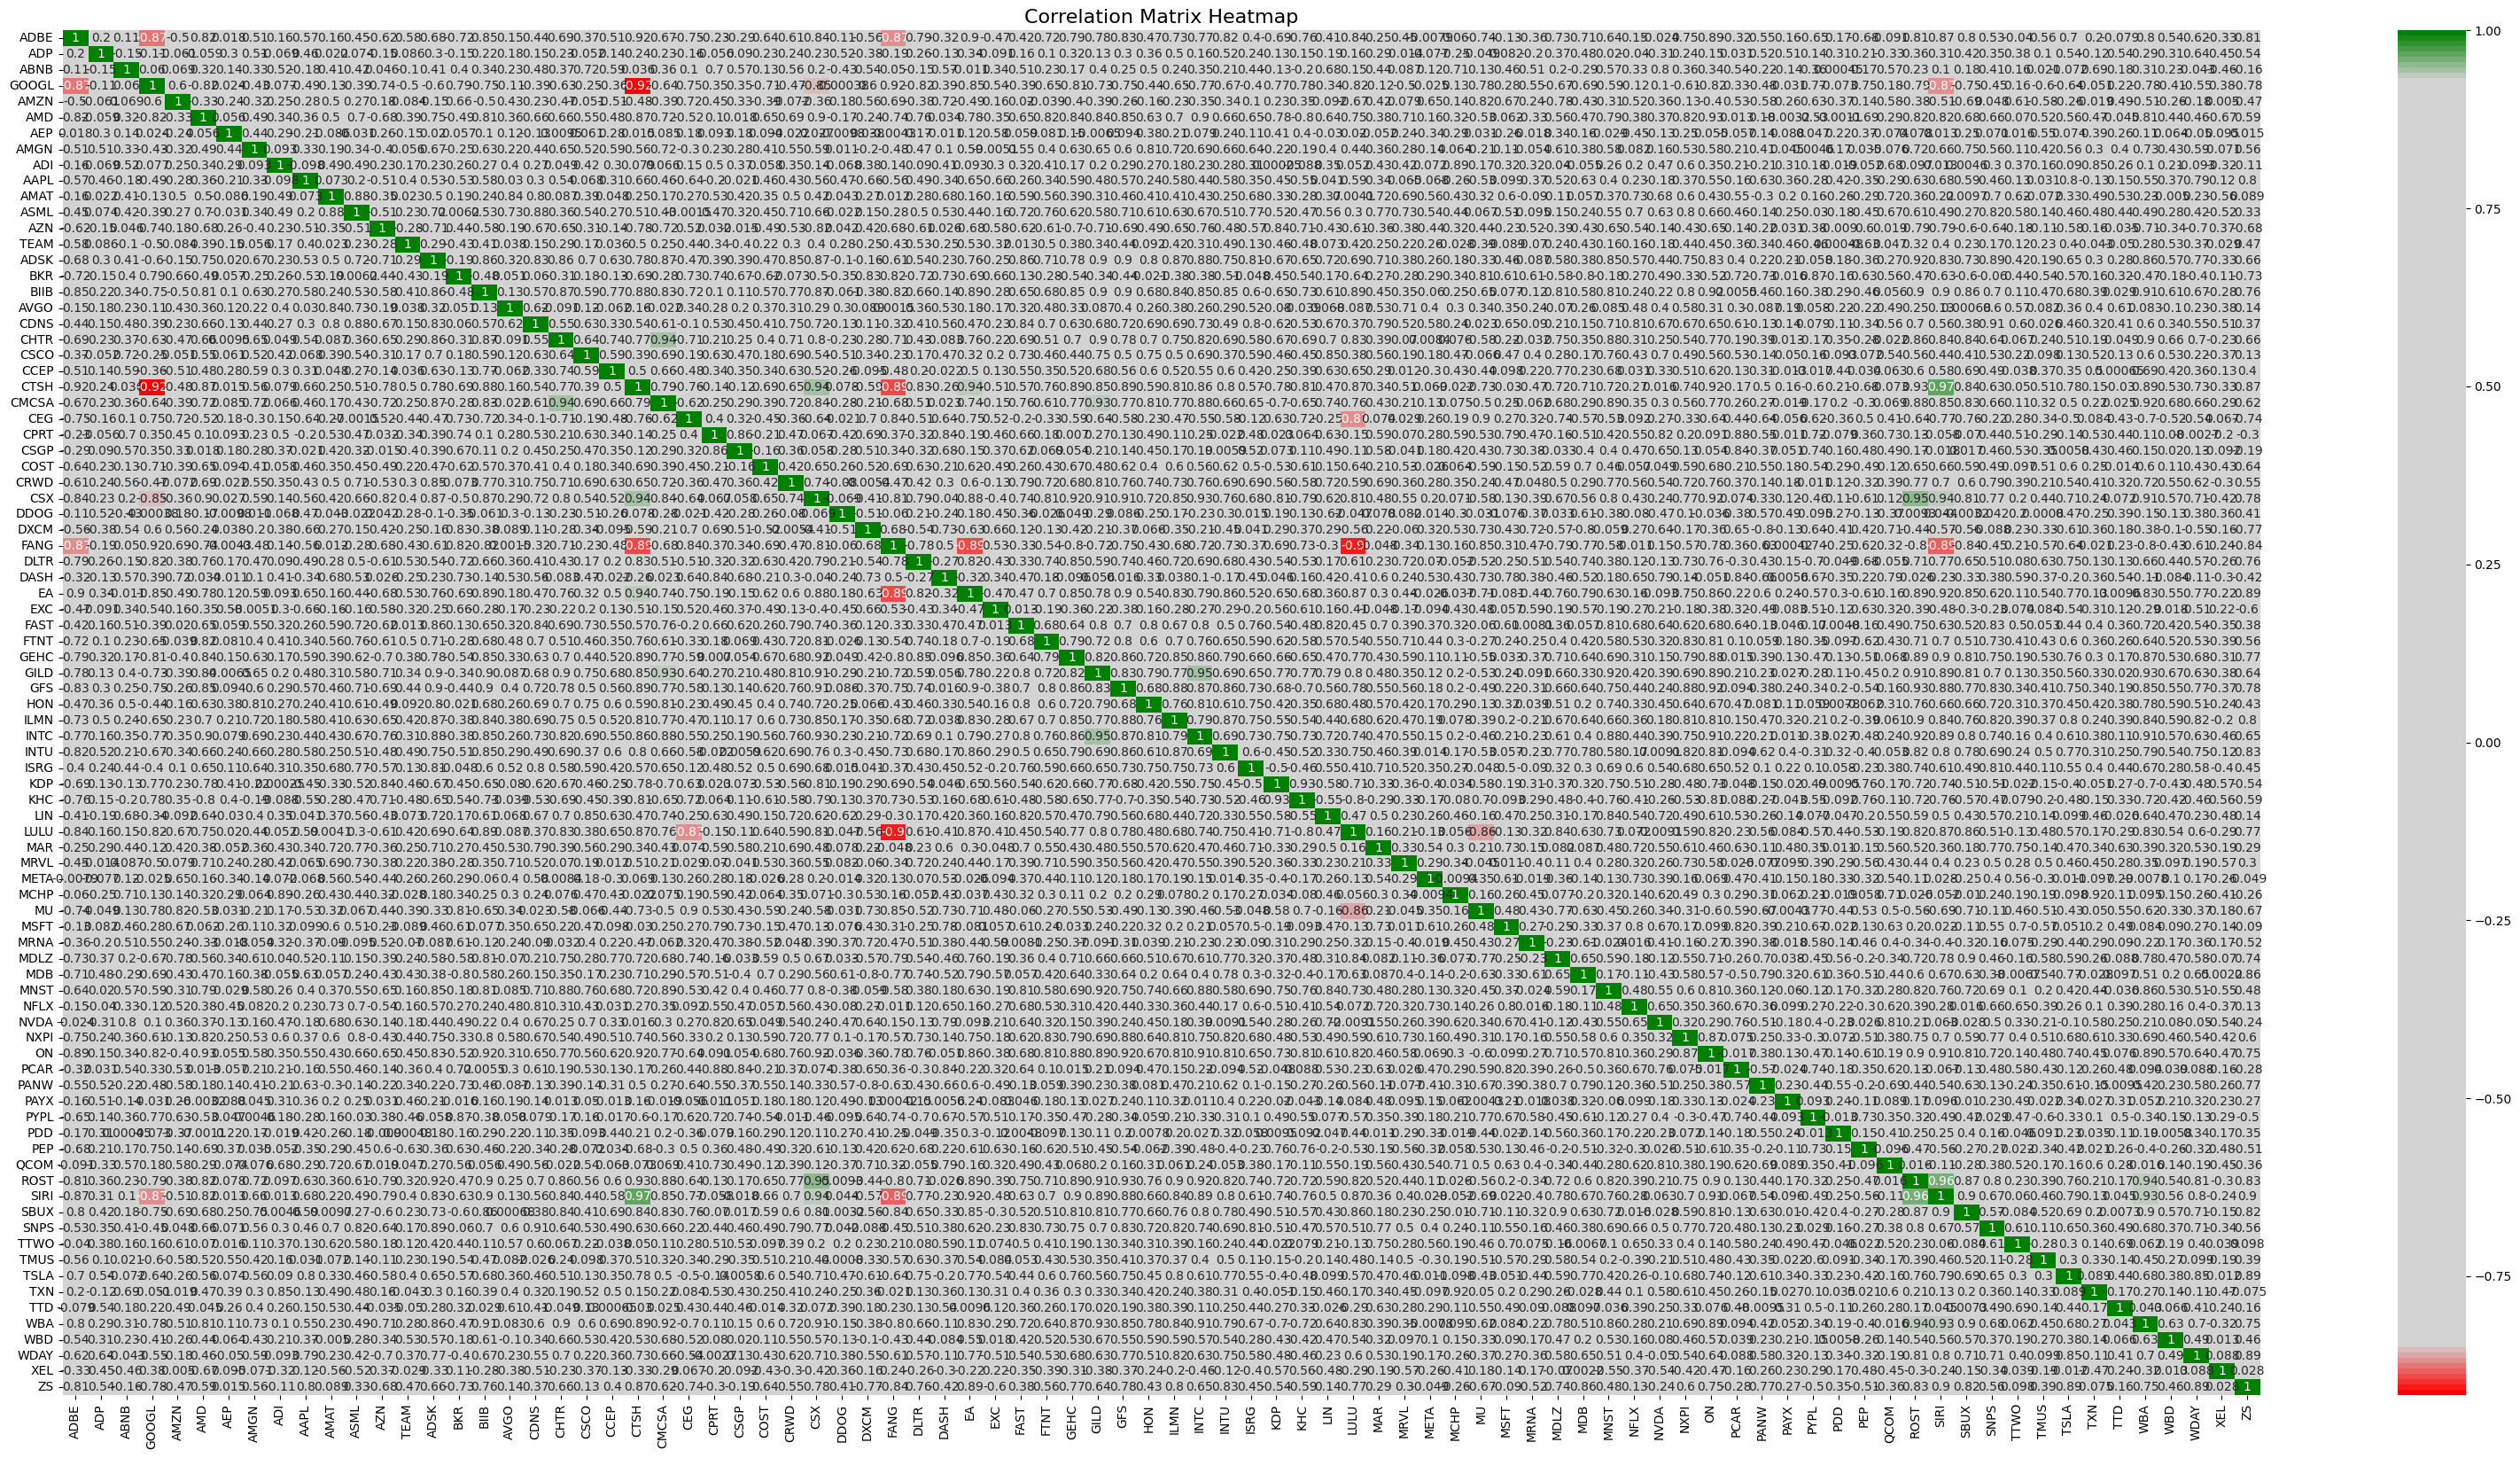

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Most correlated pair: ['CTSH', 'SIRI']


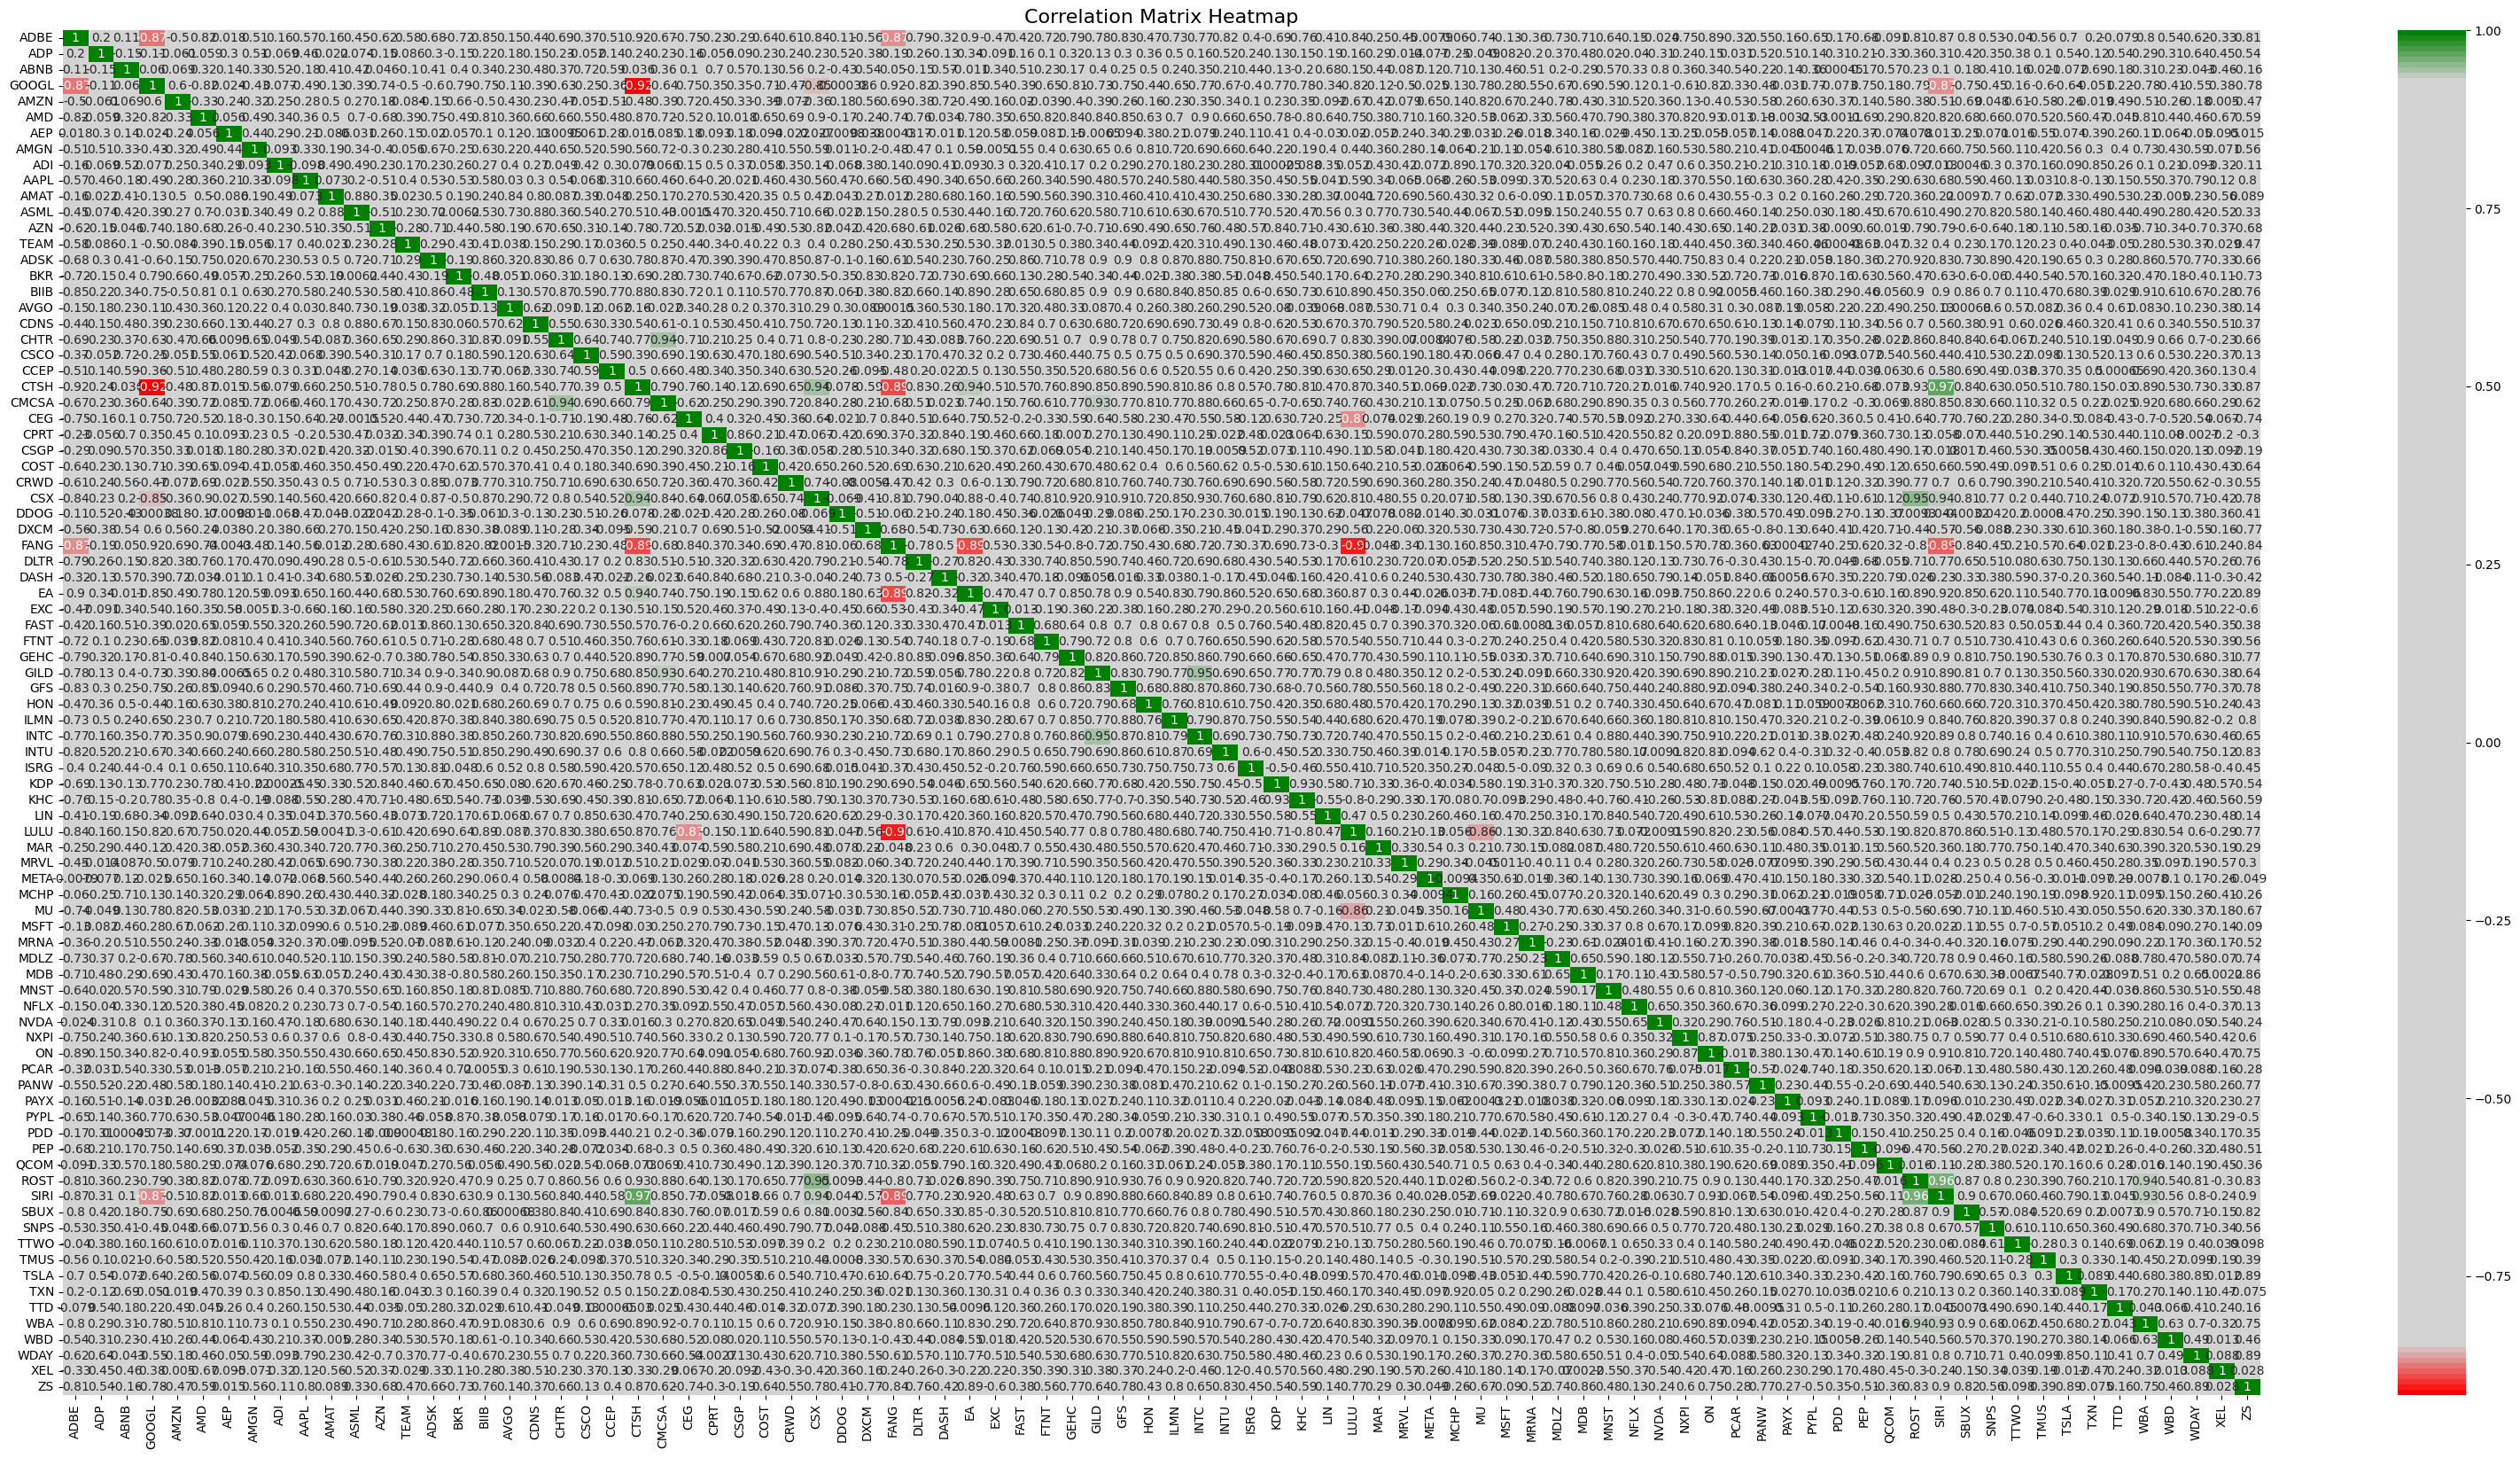

Most correlated pair: ['CTSH', 'SIRI'] with correlation: 0.9679947326234023
Pickle file saved for the final dataframe: final_dataframe.pkl

DataFrame with rolling correlation:
                      CTSH  correlation    SIRI  correlation
2024-02-26 09:45:00  78.93          NaN  4.5735          NaN
2024-02-26 09:46:00  78.93          NaN  4.5735          NaN
2024-02-26 09:47:00  78.93          NaN  4.5735          NaN
2024-02-26 09:48:00  78.93          NaN  4.5735          NaN
2024-02-26 09:49:00  78.93          NaN  4.5735          NaN


c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\src\helpermodules\correlation_study.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock1['correlation'] = df_stock1['correlation'].fillna(method=fillna_method)
c:\Users\giuli\Repositories\nasdaq_causal-analysis_lstm\src\helpermodules\correlation_study.py:283: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_stock2['correlation'] = df_stock2['correlation'].fillna(method=fillna_method)


In [8]:
# Initialize CorrelationAnalysis with DataFrame and tickers
correlation_analyzer = CorrelationAnalysis(df, tickers)

# Find the most correlated pair
# This will also save correlation results and create visualizations
most_correlated_pair = correlation_analyzer.top3_corrstocks()

print(f"Most correlated pair: {most_correlated_pair}")

# Optional: If you want to get the rolling correlation analysis for this pair
df_with_correlation = correlation_analyzer.winner_rollingcorrelation()

# Print first few rows of the combined DataFrame with correlation
print("\nDataFrame with rolling correlation:")
print(df_with_correlation.head())

In [ ]:
# Load the pickle file
with open('data/pickle_files/final_dataframe.pkl', 'rb') as file:
    final_df = pickle.load(file)

# Drop one of the 'correlation' columns from final_df
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

# Display the information of the DataFrame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17432 entries, 2024-02-26 09:45:00 to 2024-02-26 15:25:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CTSH         17432 non-null  float64
 1   correlation  17101 non-null  float64
 2   SIRI         17432 non-null  float64
 3   correlation  17101 non-null  float64
dtypes: float64(4)
memory usage: 680.9 KB


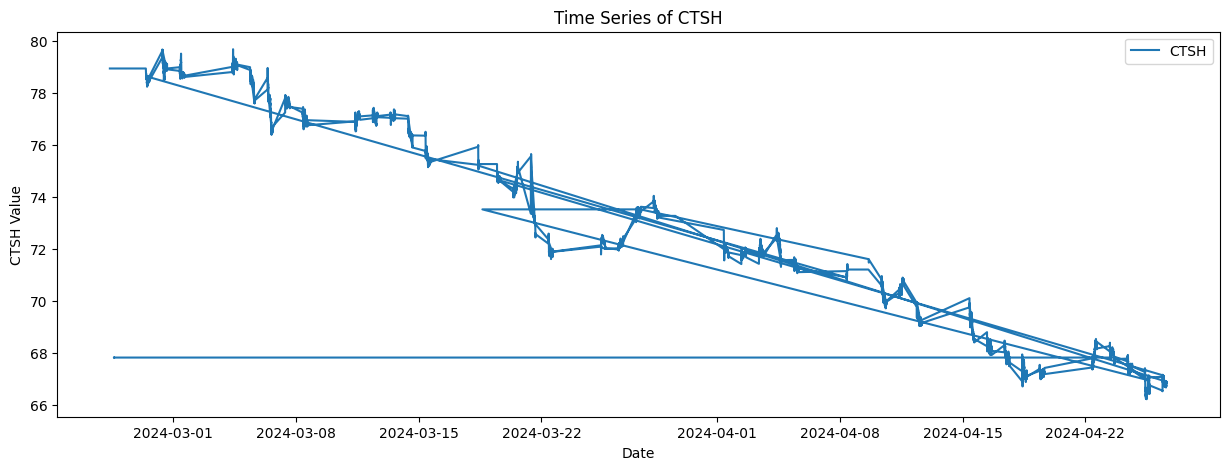

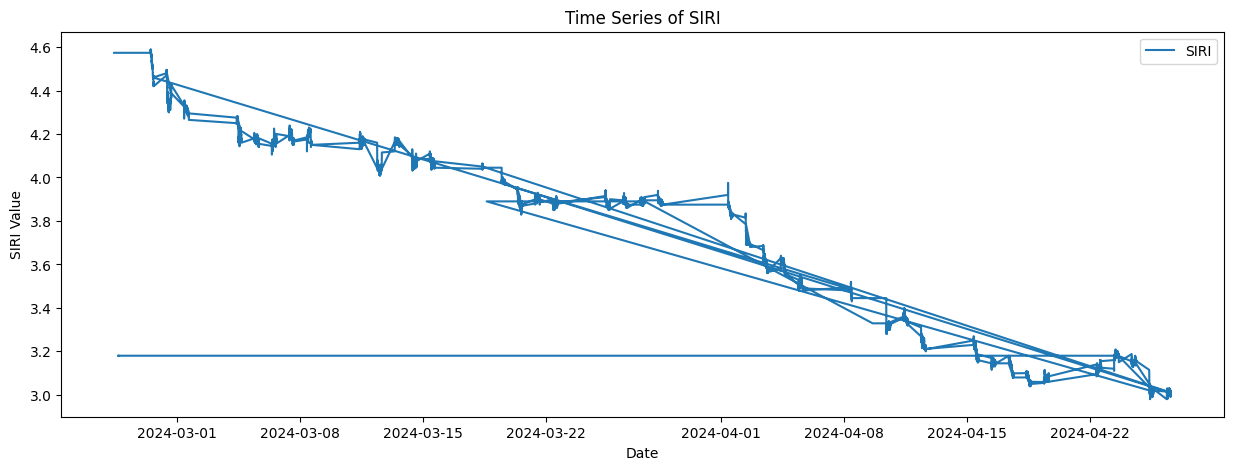

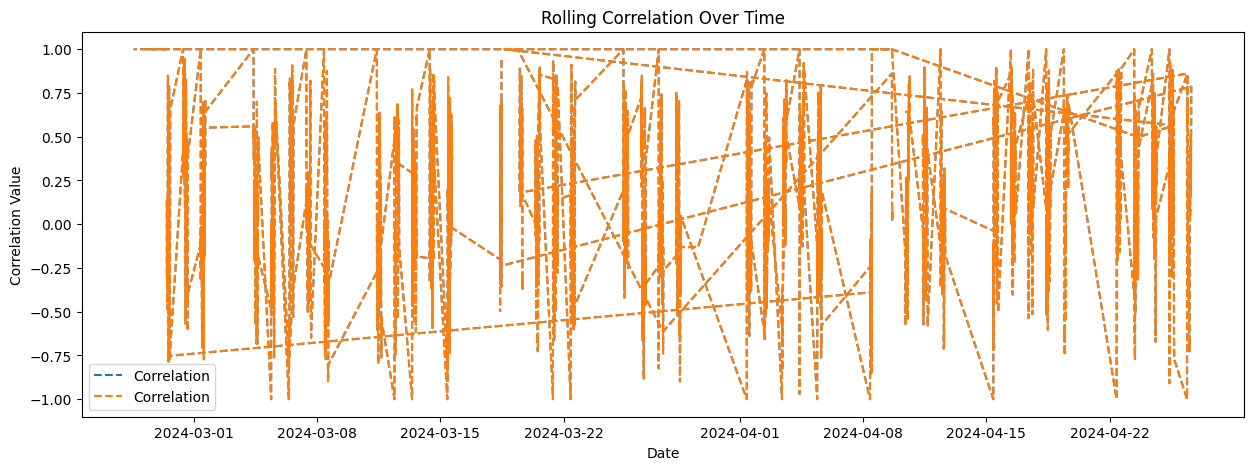

In [30]:
import matplotlib.pyplot as plt

# Plot the time series of CTSH
plt.figure(figsize=(15, 5))
plt.plot(df_with_correlation.index, df_with_correlation['CTSH'],  label='CTSH')
plt.xlabel('Date')
plt.ylabel('CTSH Value')
plt.title('Time Series of CTSH')
plt.legend()
plt.show()

# Plot the time series of SIRI
plt.figure(figsize=(15, 5))
plt.plot(df_with_correlation.index, df_with_correlation['SIRI'], label='SIRI')
plt.xlabel('Date')
plt.ylabel('SIRI Value')
plt.title('Time Series of SIRI')
plt.legend()
plt.show()

# Plot the rolling correlation
plt.figure(figsize=(15, 5))
plt.plot(df_with_correlation.index, df_with_correlation['correlation'], label='Correlation', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Correlation Value')
plt.title('Rolling Correlation Over Time')
plt.legend()
plt.show()

# Applying Granger Causality Analysis

In [32]:
# Initialize GrangerCausalityAnalysis with the DataFrame
granger_analyzer = GrangerCausalityAnalysis(final_df)


## ADF Check for stationarity

In [28]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def adf_test(series, title=''):
    """Perform ADF test and print results."""
    print(f'ADF Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = dict(zip(labels, result[0:4]))
    for key, val in out.items():
        print(f'{key}: {val}')
    for key, val in result[4].items():
        print(f'Critical Value ({key}): {val}')
    if result[1] <= 0.05:
        print("=> Stationary (reject H0)")
    else:
        print("=> Non-stationary (fail to reject H0)")
    print()

ts = final_df.copy()
for ticker in ['CTSH', 'SIRI']:
    # Select the ticker series
    series = ts[ticker]
    # Run ADF test
    adf_test(series, title=f'{ticker} Original Series')



ADF Test: CTSH Original Series
ADF Statistic: -134.5551934212044
p-value: 0.0
# Lags Used: 0
# Observations Used: 17431
Critical Value (1%): -3.430725208723446
Critical Value (5%): -2.861705827722584
Critical Value (10%): -2.5668582657994192
=> Stationary (reject H0)

ADF Test: SIRI Original Series
ADF Statistic: -140.4666320261417
p-value: 0.0
# Lags Used: 0
# Observations Used: 17431
Critical Value (1%): -3.430725208723446
Critical Value (5%): -2.861705827722584
Critical Value (10%): -2.5668582657994192
=> Stationary (reject H0)



In [ ]:

# Calculate Granger causality
granger_results = granger_analyzer.calculate_granger_causality()

# Print significant causality pairs
significant_pairs = granger_analyzer.significant_causality_pairs()


 SIRI strongly Granger-causes CTSH